In [11]:
import scanpy as sc
import numpy as np
import pandas as pd


In [12]:
adata = sc.read_10x_mtx('droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad')

FileNotFoundError: Did not find file droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad/matrix.mtx.gz.

In [6]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

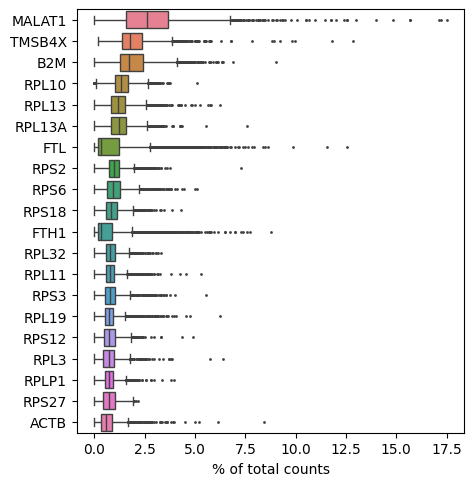

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

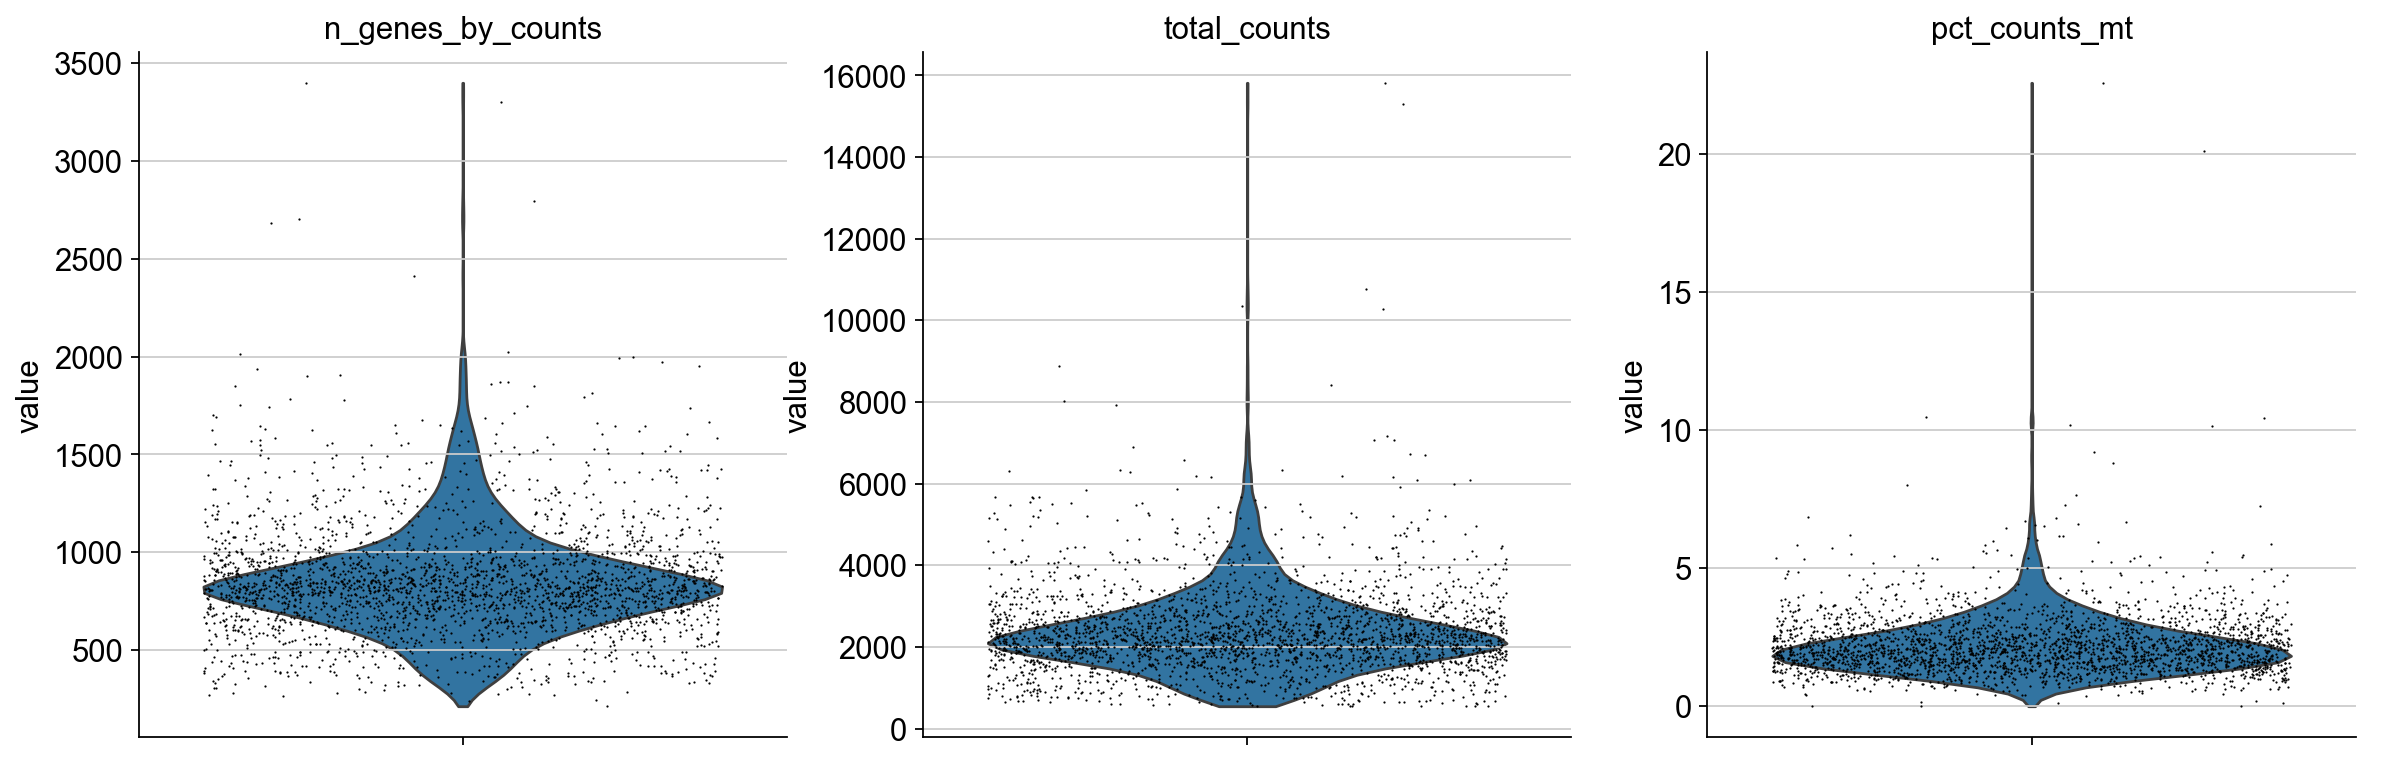

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [36]:
import scanpy as sc
f = 'droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad'

lungData = sc.read_h5ad(f)
lungData.obs

,nGene,nUMI,orig.ident,channel,tissue,region,percent.ribo,free_annotation,patient,sample,location,magnetic.selection,preparation.site,compartment
index,,,,,,,,,,,,,,
P2_1_AAACCTGAGAAACCAT,1347,2914,Human Lung 10x - Patient 2,P2_1,lung,normal,0.035347,Capillary Aerocyte_P2,2,distal 2,distal,epithelial,biohub,endothelial
P2_1_AAATGCCAGATGAGAG,1713,4226,Human Lung 10x - Patient 2,P2_1,lung,normal,0.061051,Capillary Aerocyte_P2,2,distal 2,distal,epithelial,biohub,endothelial
P2_1_AACACGTTCGATCCCT,1185,2152,Human Lung 10x - Patient 2,P2_1,lung,normal,0.048327,Capillary Aerocyte_P2,2,distal 2,distal,epithelial,biohub,endothelial
P2_1_AACACGTTCGCACTCT,1378,3419,Human Lung 10x - Patient 2,P2_1,lung,normal,0.032758,Capillary Aerocyte_P2,2,distal 2,distal,epithelial,biohub,endothelial
P2_1_AACCATGCAGCTCGCA,1210,2514,Human Lung 10x - Patient 2,P2_1,lung,normal,0.050119,Capillary Aerocyte_P2,2,distal 2,distal,epithelial,biohub,endothelial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_6_TGTCCCAGTTCTGAAC,953,1525,Human Lung 10x - Patient 3,P3_6,lung,normal,0.091803,Pericyte_P3,3,distal 3,distal,epithelial,biohub,stromal
P3_6_TTCTCCTTCTGTTTGT,999,1480,Human Lung 10x - Patient 3,P3_6,lung,normal,0.065541,Pericyte_P3,3,distal 3,distal,epithelial,biohub,stromal
P3_7_AACTCCCCACTACAGT,651,1154,Human Lung 10x - Patient 3,P3_7,lung,normal,0.178510,Pericyte_P3,3,distal 3,distal,immune and endothelial,biohub,stromal


In [38]:
lungData

AnnData object with n_obs × n_vars = 65662 × 26485
    obs: 'nGene', 'nUMI', 'orig.ident', 'channel', 'tissue', 'region', 'percent.ribo', 'free_annotation', 'patient', 'sample', 'location', 'magnetic.selection', 'preparation.site', 'compartment'
    obsm: 'X_Compartment_tSNE', 'X_tSNE'

In [37]:
for i in lungData.obs.columns:
    print(i)


nGene
nUMI
orig.ident
channel
tissue
region
percent.ribo
free_annotation
patient
sample
location
magnetic.selection
preparation.site
compartment


In [ ]:
import synapseclient 
 
 syn = synapseclient.Synapse() 
 syn.login('synapse_username','password') 
 
 # Obtain a pointer and download the data 
 syn21625095 = syn.get(entity=' syn21625095 '  ) 
 
 # Get the path to the local copy of the data file 
 filepath = syn21625095 .path 